<p style="font-family:Verdana; font-size: 26px; color: magenta"> 2.1 ML - Zillow Home Value (Zestimate) Prediction</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> Challenges include::</p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> we have been provided with logarithm differences between the actual and the predicted prices of those homes by using a benchmark model</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Importing Necessary Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This contains the eXtreme Gradient Boosting machine learning algorithm 
# which is one of the algorithms which helps us to achieve high accuracy on predictions

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Loading the Data</p>

In [2]:
# Ihe dataset contains 284,807 transactions with 31 features including:
df = pd.read_csv('../../data/Zillow.csv')
 
df.sample(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,target
22923,12758836,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,...,NaN,131982.0,393916.0,2016.0,261934.0,5101.71,NaN,NaN,6.037553e+13,0.016186
43544,17080682,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,216979.0,433958.0,2016.0,216979.0,4636.58,NaN,NaN,6.111003e+13,0.011117
9126,12212526,NaN,NaN,NaN,2.0,6.0,NaN,6.0,2.0,NaN,...,NaN,299148.0,451440.0,2016.0,152292.0,5794.85,NaN,NaN,6.037240e+13,0.145999


In [3]:
df.shape

(77613, 59)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Data Cleaning</p>

In [4]:
#  data cleaning and it includes, 
# outliers removal, 
# null value imputation, 
# and removing discrepancies of any sort in the data inputs.

In [11]:
columns_to_drop = []
for col in df.columns:

    # Removing columns having only one value.
    if df[col].nunique() == 1:
        columns_to_drop.append(col)

    # Removing columns with more than 90% of the
    # rows as null values.
    elif (df[col].isnull()).mean() > 0.60:
        columns_to_drop.append(col)

print(len(columns_to_drop))

0


In [12]:
columns_to_drop

[]

In [ ]:
# So, in total there are 30 columns that contain either unique values equal to 1 
# or have around 60% of the rows as null values.

In [13]:
df.drop(columns=columns_to_drop,
        axis=1,
        inplace=True)

In [14]:
# Let's check which column of the dataset contains which type of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   buildingqualitytypeid         49809 non-null  float64
 4   calculatedbathnbr             76963 non-null  float64
 5   calculatedfinishedsquarefeet  77378 non-null  float64
 6   finishedsquarefeet12          73923 non-null  float64
 7   fips                          77579 non-null  float64
 8   fullbathcnt                   76963 non-null  float64
 9   heatingorsystemtypeid         49571 non-null  float64
 10  latitude                      77579 non-null  float64
 11  longitude                     77579 non-null  float64
 12  lotsizesquarefeet             69321 non-null  float64
 13  p

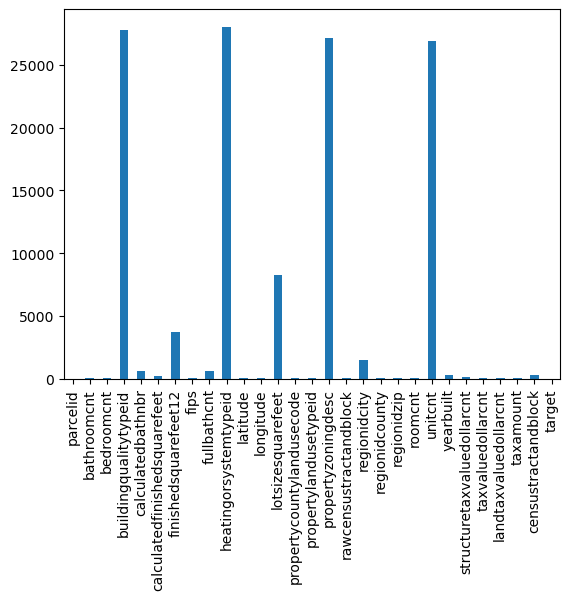

In [15]:
df.isnull().sum().plot.bar()
plt.show()

In [16]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == np.number:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

<p style="font-family:Verdana; font-size: 20px; color: orange"> Exploratory Data Analysis</p>

In [ ]:
# EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, 
# or to check assumptions with the help of statistical summaries and graphical representations. 

In [21]:
df.describe

<bound method NDFrame.describe of        parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0      14297519          3.5         4.0               6.533779   
1      17052889          1.0         2.0               6.533779   
2      14186244          2.0         3.0               6.533779   
3      12177905          3.0         4.0               8.000000   
4      10887214          3.0         3.0               8.000000   
...         ...          ...         ...                    ...   
77608  10833991          3.0         3.0               8.000000   
77609  11000655          2.0         2.0               6.000000   
77610  17239384          2.0         4.0               6.533779   
77611  12773139          1.0         3.0               4.000000   
77612  12826780          2.0         3.0               6.000000   

       calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                    3.5                        3100.0                3100.0   
1

In [22]:
from numpy import float64, int64


ints, objects, floats = [], [], []

for col in df.columns:
    if df[col].dtype == float64:
        floats.append(col)
    elif df[col].dtype == int64:
        ints.append(col)
    else:
        objects.append(col)

len(ints), len(floats), len(objects)

(1, 26, 2)

In [23]:
for col in objects:
    print(col, ' -> ', df[col].nunique())
    print(df[col].unique())
    print()

propertycountylandusecode  ->  75
['122' '1110' '0101' '010C' '1129' '0100' '38' '34' '1111' '012C' '010V'
 '1' '0103' '010D' '0200' '010E' '0300' '96' '0104' '0400' '01DC' '01HC'
 '1321' '1410' '0108' '1128' '010G' '1720' '010H' '1210' '0102' '010F'
 '010M' '1117' '0201' '0700' '1722' '73' '0109' '0301' '01HE' '135' '0204'
 '0401' '070D' '0113' '0133' '0131' '1432' '040G' '1112' '1222' '1310'
 '1120' '0111' '1116' '1421' '0110' '0105' '012E' '0141' '1333' '0115'
 '040V' '010L' '040B' '012D' '0114' '0203' '030G' '0130' '105' '020G'
 '020M' '020E']

propertyzoningdesc  ->  1907
['LAR1' 'LCR110000*' 'LAR3' ... 'HAR4-R2*' 'LCR1VV' 'BFA15000*']



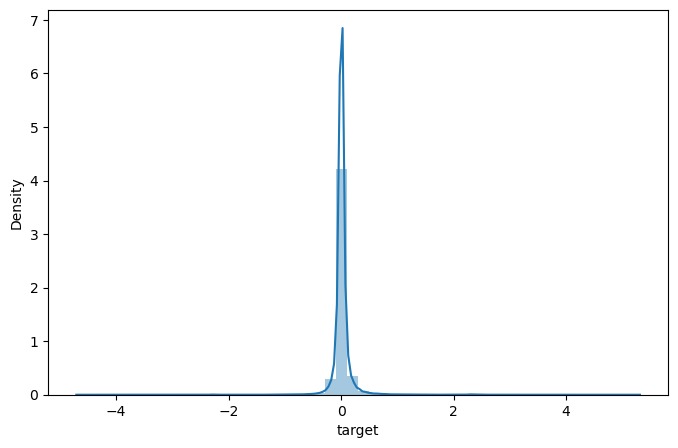

In [24]:
# The number of unique values is too high to visualize else 
# we could have plotted a count plot for these categorical columns.
plt.figure(figsize=(8, 5))
sb.distplot(df['target'])
plt.show()

In [25]:
# Distribution plot for the target column
# From the above distribution plot of the target variable,
# it seems like there are outliers in the data. Let's use a boxplot to detect them.

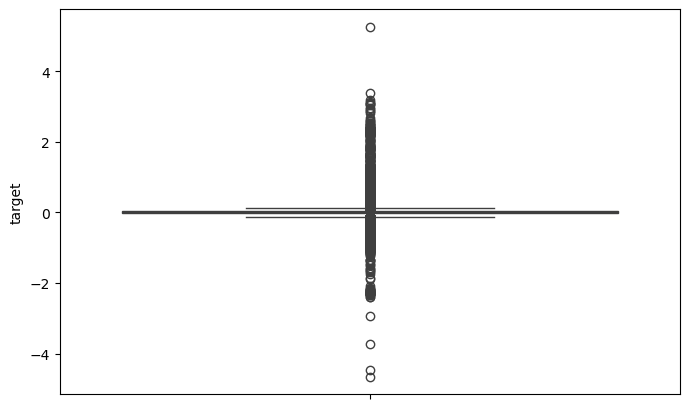

In [26]:
plt.figure(figsize=(8, 5))
sb.boxplot(df['target'])
plt.show()

In [27]:
# From the above box plot, we can clip the target values between -1 to 1 for feasible(only on patterns) training of the model.

In [28]:
print('Shape of the dataframe before removal of outliers', df.shape)
df = df[(df['target'] > -1) & (df['target'] < 1)]
print('Shape of the dataframe after removal of outliers ', df.shape)

Shape of the dataframe before removal of outliers (77613, 29)
Shape of the dataframe after removal of outliers  (77261, 29)


In [32]:
# This means that we don't lose that many points.

In [33]:
for col in objects:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

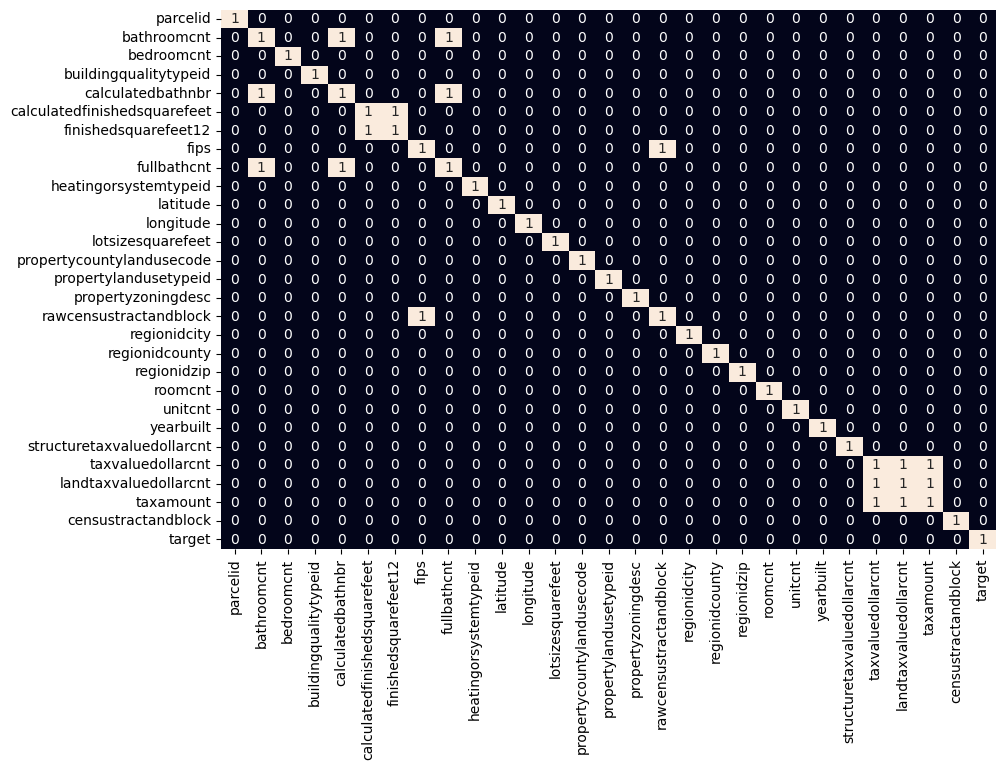

In [34]:
plt.figure(figsize=(10, 7))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [35]:
# Certainly, there are some highly correlated features in the feature space. 
# We will remove them to decrease the complexity of the data and avoid any cases of error.
columns_to_drop = ['calculatedbathnbr', 'fullbathcnt', 'fips',
             'rawcensustractandblock', 'taxvaluedollarcnt',
             'finishedsquarefeet12', 'landtaxvaluedollarcnt']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Model Training</p>

In [36]:
features = df.drop(['parcelid'], axis=1)
target = df['target'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((69534, 21), (7727, 21))

In [37]:
# Normalizing the data before feeding it into machine learning models helps us to achieve stable and fast training.
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [38]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  8.436549915793159e-17
Validation Error :  8.43086607379415e-17

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  0.0011615510279198217
Validation Error :  0.0020190995111265897

Lasso() : 
Training Error :  0.06232063320274573
Validation 